# Libraries and Tools

In [41]:
from utils import *
from student_utils import *
from brian_graph import Graph
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

In [42]:
#graph = Graph("inputs/84_50.in")
#graph = Graph("inputs/practice.in") # Homework example
#graph = Graph("inputs/264_50.in") # Pauls Example
graph = Graph("inputs/basic.in") # Basic Example

Successful instance of Graph class


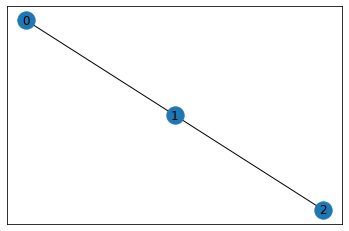

In [43]:
nx.draw_networkx(graph.G)

# Integer Linear Programming

In [44]:
graph.ILP()

Optimize a model with 11 rows, 18 columns and 32 nonzeros
Model has 12 quadratic objective terms
Variable types: 0 continuous, 18 integer (18 binary)
Coefficient statistics:
  Matrix range     [1e+00, 1e+00]
  Objective range  [1e+00, 2e+00]
  QObjective range [2e+00, 4e+00]
  Bounds range     [1e+00, 1e+00]
  RHS range        [1e+00, 1e+00]
Found heuristic solution: objective 4.0000000
Presolve removed 11 rows and 18 columns
Presolve time: 0.00s
Presolve: All rows and columns removed

Explored 0 nodes (0 simplex iterations) in 0.07 seconds
Thread count was 1 (of 4 available processors)

Solution count 2: 1 4 

Optimal solution found (tolerance 1.00e-04)
Best objective 1.000000000000e+00, best bound 1.000000000000e+00, gap 0.0000%


In [45]:
A = graph.optimal_arrangement_matrix()

In [46]:
W = graph.optimal_walking_matrix()

In [47]:
# Output format
"""
Drop-Off Locations: Soda Dwinelle Campanile Barrows Soda
Number of Distinct Locations Dropped Off: 3
Soda Cory
Dwinelle Wheeler RSF
Campanile Campanile
"""
def cycle_compression(cycle):
    locations = []
    previous = None
    for location in cycle:
        if location != previous:
            locations.append(location)
        previous = location
    return locations

vl_map = dict(enumerate(graph.list_of_locations))

cycle = []
for c in range(len(A[0])):
    vertex = np.where(A[:, c] == 1)[0][0]
    cycle.append(vl_map[vertex])
cycle

['Soda', 'Soda', 'Soda']

In [48]:
# Final Cycle Output
cycle_compression(cycle)

['Soda']

In [49]:
# Number of Distinct Locations
num_distinct_locations = len(set(cycle[1:-1]))
num_distinct_locations

1

In [50]:
homes_set = set(graph.list_of_houses)
TAs = []
for i in range(len(graph.list_of_locations)):
    if graph.list_of_locations[i] in homes_set:
        TAs.append((i, graph.list_of_locations[i]))
TAs

[(2, 'Home')]

In [51]:
# Drop-Off Locations
drop_off_map = {}
for index, home in TAs:
    vertex = np.where(W[:, index] == 1)[0][0]
    drop_off_location = vl_map[vertex]
    if drop_off_location not in drop_off_map:
        drop_off_map[drop_off_location] = [home,]
    else:
        drop_off_map.get(drop_off_location, []).append(home)

In [52]:
drop_off_map

{'Soda': ['Home']}